In [1]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
%pylab inline 
import cv2
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


In [3]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer


In [4]:
img = Image.open('paracetamol.jpeg')

In [5]:
print(pytesseract.image_to_string(img))


| R
Levocetirizine Hydrochloride, 4
Phenylephrine Hydrochloride
with Paracetamol Tablets

(Silmarest® LP )
iceet ay

ci 10 Tablets


Original Dimensions :  (491, 877, 3)
Resized Dimensions :  (982, 1754, 3)


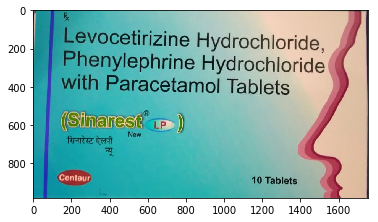

In [6]:
img = cv2.imread("paracetamol.jpeg")
print('Original Dimensions : ',img.shape)
scale_percent = 200 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
figure()
imshow(resized)

In [7]:
print(pytesseract.image_to_string(resized))

Ry
Levocetirizine Hydrochloride,
Phenylephrine Hydrochloride |
with Paracetamol Tablets
(Simarest; ip_))

arc

feat
a

Centaur 10 Tablets


In [8]:
txt =pytesseract.image_to_string(resized)
lst=word_tokenize(txt)
lst.sort(key=len) 
lst.sort(key=lambda item: (-len(item), item))
print(lst)

['Levocetirizine', 'Hydrochloride', 'Hydrochloride', 'Phenylephrine', 'Paracetamol', 'Simarest', 'Centaur', 'Tablets', 'Tablets', 'feat', 'with', 'arc', 'ip_', '10', 'Ry', '(', ')', ')', ',', ';', 'a', '|']


In [9]:
#removing non word character
import re
result1 = re.sub(r"\W", " ", txt, flags=re.I) 
#remove digit 
result2 = re.sub(r"\d", "", result1) 
lst=word_tokenize(result2)
lst.sort(key=len) 
lst.sort(key=lambda item: (-len(item), item))
print(lst)



['Levocetirizine', 'Hydrochloride', 'Hydrochloride', 'Phenylephrine', 'Paracetamol', 'Simarest', 'Centaur', 'Tablets', 'Tablets', 'feat', 'with', 'arc', 'ip_', 'Ry', 'a']


In [10]:
def by_size(words, size):
    return [word for word in words if len(word) >= size]
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

lst2= by_size(lst,5)
lst3=Remove(lst2)
lst3

['Levocetirizine',
 'Hydrochloride',
 'Phenylephrine',
 'Paracetamol',
 'Simarest',
 'Centaur',
 'Tablets']

In [11]:
#for all :https://www.google.com/search?q=Levocetirizine+Hydrochloride+Phenylephrine+Paracetamol+Simarest+Centaur+Tablets&source=lnms
#for news :
#piece of code that concatenate the string 

str1 = 'https://www.google.com/search?q=lybrate'
str2= '&source=lnms'
for l in lst3:
    str1 = str1+'+'+l
url = str1+str2    
    
    

#url=str1+lst3[0]+str2
url


'https://www.google.com/search?q=lybrate+Levocetirizine+Hydrochloride+Phenylephrine+Paracetamol+Simarest+Centaur+Tablets&source=lnms'

In [109]:
#complete script
import bs4 as bs  
from urllib.request import Request, urlopen  
import re
from nltk.tokenize import sent_tokenize,word_tokenize
#from nltk.corpus import stopwords
import nltk
import heapq  
import requests
from lxml.html import fromstring
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
parsed_article = bs.BeautifulSoup(webpage,'html')

#parsed_article.findall('div')


#containers[0]
#links = parsed_article.find_all('a')
#links = parsed_article.findAll('div', {'class':'TbwUpd'})

In [129]:

req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()

parsed_article = bs.BeautifulSoup(webpage,'html')
containers = parsed_article.select(".r a")
for cont in containers:
    med = cont['href']
    med = med[7:]
    med = med.split("&")
    med = med[0]
    if med[0]=='h':
        #print(med)
        req1 = Request(med, headers={'User-Agent': 'Mozilla/5.0'})
        webpage1 = urlopen(req1).read()
        parsed_article1 = bs.BeautifulSoup(webpage1,'html')
        p =parsed_article1.find('div', {'class': 'body'})
        article_text = p.text
        break
        
        
        
        
    
#    print(type(cont))
#for item in parsed_article.select(".r a"):
 #   print(item.text)
#containers = parsed_article.select(".r a")    

In [130]:
#complete script
import bs4 as bs  
#import urllib.request  
import re
from nltk.tokenize import sent_tokenize,word_tokenize
#from nltk.corpus import stopwords
import nltk
import heapq  
#scraped_data = urllib.request.urlopen(url)  
#article = scraped_data.read()

#parsed_article = bs.BeautifulSoup(article,'html')

#paragraphs = parsed_article.find_all('p')

#article_text = ""

#for p in paragraphs:  
#    article_text += p.text

    
#article_text = "Sinarest Levo Tablet belongs to the drug group called antihistamine that can help to relieve the symptoms like runny nose, itchy or watery eyes, sneezing, hives that are usually related to all-year round as well as seasonal allergies. The medicine blocks histamine (natural substance) that the body generates during the time of an allergic reaction, relieving you of the symptoms of the reaction. Sinarest Levo Tablet needs to be taken orally and is available in tablet form as well as a solution. It can be used in the form of combination therapy, meaning you may be prescribed this drug along with other medications. You can take the medicine with your food or without it.Sinarest Levo Tablet belongs to the drug group known as antihistamines. It is used for the treatment of the symptoms that are associated with allergies, both seasonal and all-year round. This medication can also be used to get relief from itching caused due to hives. Sinarest Levo Tablet blocks the release of histamine, a chemical from your body’s cells. It, therefore, provides you relief from the allergic symptoms such as runny nose, sneezing, and watery, red or itchy eyes.The dosage of Sinarest Levo Tablet depends on your age, the severity of your condition, medical history and your body’s reaction after the first dose. Your doctor should be informed about your medical history and condition, along with certain conditions like pregnancy, allergies, enlarged prostrate or a kidney disease before you are prescribed to this medicine. You can take Sinarest Levo Tablet with your food or without it. Also, it is better to take it during the evening, as that can prevent you from feeling drowsy in the daytime. Make sure that you do not take an overdose of the medicine in case you skipped one dose, as it can lead to other side effects.You should also keep in mind not to stop these medicines suddenly as there is a possibility that your symptoms may get worse. Too much of Sinarest Levo Tablet can lead to extensive drowsiness. It is advisable to take in the amount as prescribed by your doctor.The side effects of Sinarest Levo Tablet can vary depending on the age group. In case of children above 12 years and adults, the common side effects are sore throat, dry mouth, tiredness and nasopharyngitis (inflammation and redness of your throat and nose). Children of 6-11 years can suffer from cough, fever, bleeding from the nose or sleepiness. Children younger than 6 years may experience diarrhea, vomiting and constipation. These mild side effects do not stay long, but you can consult your doctor for a solution. There are some serious side effects though, that need immediate treatment, like:Allergic reactions, that can cause itching, swelling of your face or throat, or a rashProblems related to the kidney, like trouble in urinating, changes in your usual amount of urine or blood in urineBlurred visioYellowing of your skin or the eyesDifficulty breathingSudden mood changes like getting agitated, aggressive, having suicidal thoughtsSinarest Levo Tablet is known to cause drowsiness, especially in the initial hours. Refrain yourself from activities like driving or using machinery during this period. Also, avoid alcohol as it can further raise your risk of feeling drowsy.Information given here is based on the salt and content of the medicine. Effect and uses of medicine may vary from person to person. It is advicable to consult a Internal Medicine Specialist before using this medicine."   
    
    
#preprocessing
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)  
article_text = re.sub(r'\s+', ' ', article_text)  
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )  
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)  

sentence_list = nltk.sent_tokenize(article_text)  
stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}  
for word in nltk.word_tokenize(formatted_article_text):  
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1
sentence_scores = {}  
for sent in sentence_list:  
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

summary = ' '.join(summary_sentences)  
print(summary)                      

In case of children above 12 years and adults, the common side effects are sore throat, dry mouth, tiredness and nasopharyngitis (inflammation and redness of your throat and nose). The medicine blocks histamine (natural substance) that the body generates during the time of an allergic reaction, relieving you of the symptoms of the reaction. Make sure that you do not take an overdose of the medicine in case you skipped one dose, as it can lead to other side effects. It, therefore, provides you relief from the allergic symptoms such as runny nose, sneezing, and watery, red or itchy eyes. It can be used in the form of combination therapy, meaning you may be prescribed this drug along with other medications. The dosage of Sinarest Levo Tablet depends on your age, the severity of your condition, medical history and your body’s reaction after the first dose. You should also keep in mind not to stop these medicines suddenly as there is a possibility that your symptoms may get worse.


In [ ]:
###################################final###########################################################

In [1]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
import bs4 as bs  
from urllib.request import Request, urlopen  
import re
from nltk.tokenize import sent_tokenize,word_tokenize,WhitespaceTokenizer
import nltk
import heapq  
import requests
import re
#from lxml.html import fromstring
%pylab inline 
import cv2
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


In [2]:
def by_size(words, size):
    return [word for word in words if len(word) >= size]
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

In [6]:
img = cv2.imread("mupir.jpeg")
#print('Original Dimensions : ',img.shape)
scale_percent = 200 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#print('Resized Dimensions : ',resized.shape)

txt =pytesseract.image_to_string(resized)
#lst=word_tokenize(txt)
#lst.sort(key=len) 
#lst.sort(key=lambda item: (-len(item), item))
#print(lst)



result1 = re.sub(r"\W", " ", txt, flags=re.I) 
#remove digit 
result2 = re.sub(r"\d", "", result1) 
lst=word_tokenize(result2)
lst.sort(key=len) 
lst.sort(key=lambda item: (-len(item), item))

lst2= by_size(lst,5)
lst3=Remove(lst2)
#lst3
#str0 = 'https://www.google.com/search?q='
#str1 = 'lybrate'
#str2= '&source=lnms'
#for l in lst3:
#    str1 = str1+'+'+l
#u = str1+str2    
#url = u.encode('utf-8')
#url = url.decode('utf-8')
#url = str0 + url 
#url = url[2:]
article_text = ''
str1 = 'https://www.google.com/search?q=lybrate'
str2= '&source=lnms'

for l in lst3:
    str1 = str1+'+'+l

#str1 = str1.lower()    
url = str1+str2  

print(url)

req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()

parsed_article = bs.BeautifulSoup(webpage,'html')
containers = parsed_article.select(".r a")
for cont in containers:
    med = cont['href']
    med = med[7:]
    med = med.split("&")
    med = med[0]
    if med[0]=='h':
        #print(med)
        req1 = Request(med, headers={'User-Agent': 'Mozilla/5.0'})
        webpage1 = urlopen(req1).read()
        parsed_article1 = bs.BeautifulSoup(webpage1,'html')
        #p =parsed_article1.find('div', {'class': 'body'})
        #article_text = p.text
        points =parsed_article1.findAll('div', {'class': 'lybMar-btm--double'})
        for p in points:
            #print(p.text)
            article_text += p.text
            
        break
print(article_text)
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)  
article_text = re.sub(r'\s+', ' ', article_text)  
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )  
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)  

sentence_list = nltk.sent_tokenize(article_text)  
stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}  
for word in nltk.word_tokenize(formatted_article_text):  
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1
sentence_scores = {}  
for sent in sentence_list:  
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

summary = ' '.join(summary_sentences)  


print(summary)  


https://www.google.com/search?q=lybrate+MUPIROCIN+OINTMENT+Ointment+bovis&source=lnms
 The medication is prescribed when one is suffering from skin infections such as impetigo and other bacterial disease. It is used to treat bacterial disease affecting the skin.  The contraindication of this medication is that it can only be used in the treatment of bacterial infections, it is not used in the treatment of viral and fungal infections.  No, reactions with alcohol were established, however, it is recommended that you should consult your doctor before you drink alcohol while under this medication.  Yes, you should consult your doctor if you are pregnant, or planning on becoming pregnant as there are some minor risks and may cause some harm to your unborn child.  It is not proved that the ointment passes on through breast milk, however there is a chance of the baby licking the ointment from the skin, therefore it is recommend that you consult your doctor for further advice. There is no inte

In [ ]:
from gtts import gTTS
import os
import pygame
pygame.mixer.init()
language = 'en'

tts = gTTS(text=summary, lang=language, slow=False)
tts.save("voice.mp3")
os.system("voice.mp3")